# MOUVEMENT CHAOTIQUE D'UN PENDULE PESANT

On se propose d’étudier le mouvement d’un pendule pesant soumis à une excitation sinusoïdale d’abord dans le régime classique puis dans le régime chaotique.

Les trois principaux objectifs de ce projet sont :
* Ecrire et implanter les équations du mouvement du pendule. 
* Représenter graphiquement la trajectoire.
* Mener un ensemble de simulations dont les paramètres vous sont donnés.

Une présentation possible du chaos peut être faite lors de l'étude d'un pendule pesant soumis à une force excitatrice et à une force de frottements visqueux. L'équation du mouvement déduite du théorème du moment cinétique s'écrit: 

$$\frac{d^2 \phi}{dt^2} = -\frac{g}{l} \sin(\phi) -f \; \frac{d\phi}{dt} + A\; \sin(\Omega t)$$

où $l$ est la longueur du pendule, $f$ l'amplitude de la force de frottement et $A$ l'amplitude de l'excitation. Pour simplifier l'étude, on se place dans le cas où $g/l= 1$ rad.s-2 . L'équation devient :
$$\frac{d^2 \phi}{dt^2} = -\sin(\phi) -f \; \frac{d\phi}{dt} + A\; \sin(\Omega t)$$

## But du projet
Développer un programme de simulation pour étudier le comportement d'un pendule théorique pour un ensemble de valeurs des paramètres 
$f$, $A$ et $\omega$ et de conditions initiales c'est à dire les valeurs de l'angle $\phi(0)$ et de la vitesse angulaire $\frac{d\phi}{dt}(0)$ à l'instant $t=0$.  
Connaissant $\phi(0)$ et$\frac{d\phi}{dt}(0)$, il est en principe possible de résoudre numériquement l'équation différentielle et de déterminer à chaque instant $\phi(t)$ et$\frac{d\phi}{dt}(t)$.  L'état du système est par conséquent complètement décrit par ces deux variables d'états.  

### Préliminaires mathématiques
Il est obligatoire de transformer l'équation différentielle d'ordre 2 en un système d'équations différentielles d'ordre 1.

$$
\begin{cases}
\dfrac{d\phi}{dt} = \omega \\
\dfrac{d\omega}{dt} = -\sin(\phi) - f\, \omega + A \sin(\Omega t)
\end{cases}
$$
connaissant $\phi(0)$ et$\frac{d\phi}{dt}(0) = \omega(0)$

### Résolution d'équations différentielles avec __solve\_ivp__ de __scipy.integrate__

La fonction __solve\_ivp__ du module __scipy.integrate__ permet de résoudre numériquement des équations différentielles ordinaires (EDO) de la forme :
$$
\frac{d\mathbf{u}}{dt} = f(t, \mathbf{u}(t)), \quad \mathbf{u}(0) = (\phi(0), \omega(0))
$$

### Caractéristiques principales
* Résolution d’EDO de premier ordre, scalaires ou vectorielles.
* Méthodes à pas de temps adaptatifs : Runge-Kutta explicites (__RK45__) ou implicites (__BDF__, __LSODA__).
* Contrôle de la précision avec les arguments __rtol__ (tolérance relative) et __atol__ (tolérance absolue).

# Exercice :
Développer le système d'équations différentielles dans la fonction __pendulum_forced__.

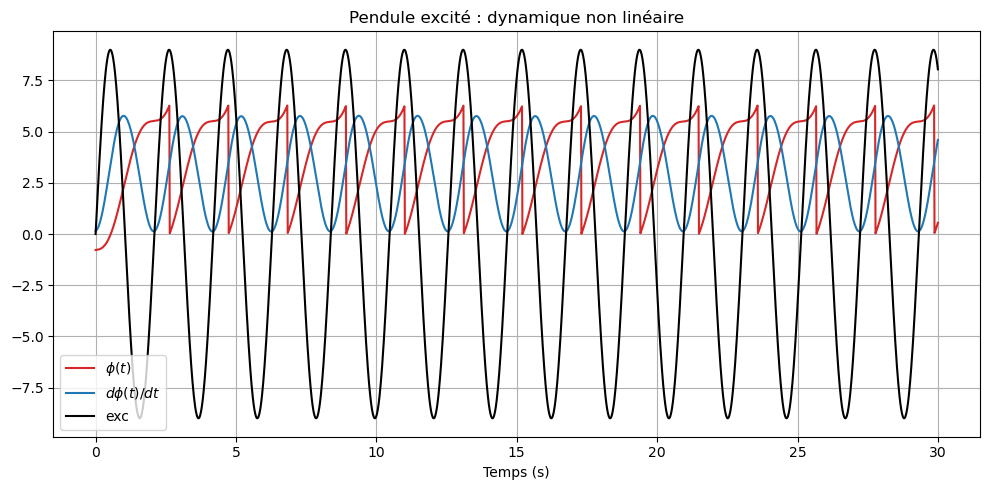

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# --------------------------------------------------------------------
# Paramètres physiques du pendule
# --------------------------------------------------------------------
# brisure de symétrie
phi0 = -0.78
omega0 = 0.15
f = 0.1          # amortissement visqueux
A = 9.0         # amplitude de l'excitation
Pulsation = 3.0  # pulsation de l'excitation en (rad/s)

# --------------------------------------------------------------------
# Système d'EDO (forme vectorielle)
# --------------------------------------------------------------------
# Entrée :
#   t : float - temps
#   u : ndarray [phi, omega] - état du système
# Sortie :
#   du_dt : ndarray - dérivée de l'état
# --------------------------------------------------------------------
def pendulum_forced(t, u):
    phi, omega = u
    du_dt = np.zeros_like(u)
    # système d'équations différentielles
    du_dt[0] = omega
    du_dt[1] = -np.sin(phi) -f * omega + A * np.sin(Pulsation * t)
    return du_dt

# --------------------------------------------------------------------
# Simulation principale
# --------------------------------------------------------------------
def simulation(tf, u0):
    # Temps de sauvegarde
    tw = np.linspace(0, tf, 2000)

    # Intégration
    sol = solve_ivp(pendulum_forced, (0, tf), u0, t_eval=tw, method='RK45', max_step=0.1)
    return tw, sol

def draw_evolution(tw, sol):
    # Affichage
    plt.figure(figsize=(10, 5))
    plt.plot(sol.t, np.fmod(sol.y[0], 2*np.pi), label=r'$\phi(t)$', color='tab:red')
    plt.plot(sol.t, sol.y[1], label=r'$d\phi(t)/dt$', color='tab:blue')
    plt.plot(tw, A * np.sin(Pulsation * tw), 'k', label=r'exc')
    plt.xlabel("Temps (s)")
    plt.title("Pendule excité : dynamique non linéaire")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
# --------------------------------------------------------------------
# Point d’entrée du script
# --------------------------------------------------------------------
if __name__ == "__main__":
    tf = 30
    # Conditions initiales : pendule au repos
    u0 = [phi0, omega0]
    [tw, sol] = simulation(tf, u0)
    draw_evolution(tw, sol)


# Espace des phases et de Poincaré
* Le plan formé de $(\phi(t), \omega(t))$ définit l'espace des phases pour chaque instant.
* L'espace de Poincaré est l'échantillonnage de $(\phi(t), \omega(t))$ à chaque instant $t=n \frac{2 \pi}{\Omega}$ où $n$ est un entier.

# Exercice :
Tracez l'espace des phase en définissant une fonction __espace_phase__(tw, uw) où tw et uw sont deux tableaux numpy.
    """
    Affiche l'espace des phases (φ, dφ/dt) d'un pendule excité.

    Paramètres
    ----------
    tw : array_like
        Tableau des instants de temps (non utilisé ici, mais peut servir à d'autres affichages).
    uw : array_like, shape (2, N)
        Tableau contenant les deux composantes :
        - uw[0] : les angles φ(t) en radians,
        - uw[1] : les vitesses angulaires dφ/dt en rad/s.

    Affichage
    ---------
    Une figure matplotlib avec le portrait de phase (φ, dφ/dt),
    où chaque point correspond à un état instantané du système.
    Les points ne sont pas reliés pour visualiser la distribution dans l'espace des phases.
    """
    
_indication_ : sol.y[0] contient les valeurs de $\phi(t)$ et sol.y[1] celles de $d\phi/dt$.

(2, 2000)


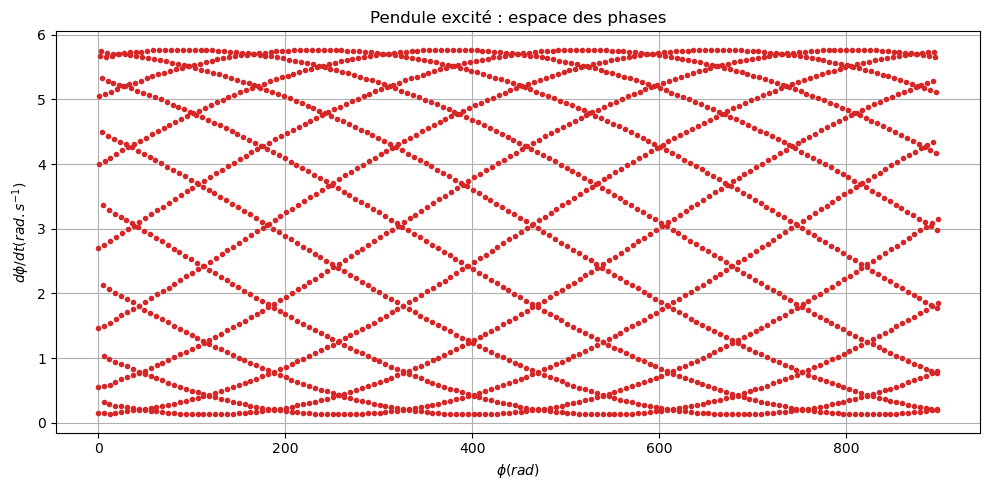

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# --------------------------------------------------------------------
# Paramètres physiques du pendule
# --------------------------------------------------------------------
# brisure de symétrie
phi0 = -0.78
omega0 = 0.15
f = 0.1          # amortissement visqueux
A = 9.0         # amplitude de l'excitation
Pulsation = 3.0  # pulsation de l'excitation en (rad/s)

def pendulum_forced(t, u):
    """
    Système d'équations différentielles pour un pendule pesant
    soumis à un amortissement linéaire et une excitation harmonique.

    Paramètres
    ----------
    t : float
        Temps courant (en secondes).
    u : array_like, shape (2,)
        Vecteur d'état du système :
        - u[0] : angle φ(t) en radians,
        - u[1] : vitesse angulaire ω(t) = dφ/dt en rad/s.

    Retour
    ------
    du_dt : ndarray, shape (2,)
        Dérivée temporelle du vecteur d'état :
        - du_dt[0] = ω,
        - du_dt[1] = -sin(φ) - f·ω + A·sin(Ω·t)
    """
    phi, omega = u
    du_dt = np.zeros_like(u)
    # système d'équations différentielles
    du_dt[0] = omega
    du_dt[1] = -np.sin(phi) -f * omega + A * np.sin(Pulsation * t)
    return du_dt

# --------------------------------------------------------------------
# Simulation principale
# --------------------------------------------------------------------
def simulation(t0, tf, u0):
    """
    Simule la dynamique d'un pendule amorti et forcé sur un intervalle de temps donné.

    Paramètres
    ----------
    t0 : float
        Temps initial de la simulation (en secondes).
    tf : float
        Temps final de la simulation (en secondes).
    u0 : array_like, shape (2,)
        Conditions initiales :
        - u0[0] : angle initial φ(0) en radians,
        - u0[1] : vitesse angulaire initiale ω(0) en rad/s.

    Retour
    ------
    tw : ndarray
        Tableau des instants de temps (2000 points uniformément répartis de 0 à tf).
    sol : Bunch object
        Résultat de l’intégration retourné par `solve_ivp`.
        Contient notamment :
        - `sol.t` : les temps évalués (identique à `tw`),
        - `sol.y` : les solutions (φ et ω) à chaque instant.
    """
    # Temps de sauvegarde
    tw = np.linspace(0, tf, 2000)

    # Intégration
    sol = solve_ivp(pendulum_forced, (0, tf), u0, t_eval=tw, method='RK45', max_step=0.1)
    return tw, sol

def draw_evolution(tw, sol):
    """
    Affiche l'évolution temporelle de l'angle et de la vitesse angulaire
    d'un pendule pesant soumis à une excitation harmonique et un amortissement.

    Paramètres
    ----------
    tw : ndarray
        Tableau des instants de temps (en secondes).
    sol : 
        Résultat de l’intégration retourné par `solve_ivp`, contenant :
        - sol.t : les temps évalués (doit coïncider avec tw),
        - sol.y[0] : l’angle φ(t) en radians,
        - sol.y[1] : la vitesse angulaire dφ/dt(t) en rad/s.

    Affichage
    ---------
    Une figure matplotlib présentant deux courbes :
    - φ(t) : en rouge,
    - dφ/dt(t) : en bleu.
    """
    plt.figure(figsize=(10, 5))
    plt.plot(sol.t, sol.y[0], label=r'$\phi(t)$', color='tab:red')
    plt.plot(sol.t, sol.y[1], label=r'$d\phi(t)/dt$', color='tab:blue')
    plt.xlabel("Temps (s)")
    plt.title("Pendule excité : dynamique non linéaire")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

def espace_phase(uw):
    """
    Affiche l'espace des phases (φ, dφ/dt) d'un pendule excité.

    Paramètres
    ----------
    uw : array_like, shape (2, N)
        Tableau contenant les deux composantes :
        - uw[0] : les angles φ(t) en radians,
        - uw[1] : les vitesses angulaires dφ/dt en rad/s.

    Affichage
    ---------
    Une figure matplotlib avec le portrait de phase (φ, dφ/dt),
    où chaque point correspond à un état instantané du système.
    Les points ne sont pas reliés pour visualiser la distribution dans l'espace des phases.
    """
    plt.figure(figsize=(10, 5))
    plt.plot(uw[0], uw[1], color='tab:red', marker='.', linestyle='none')
    plt.xlabel(r'$\phi(rad)$')
    plt.ylabel(r'$d\phi/dt(rad.s^{-1})$')
    plt.title("Pendule excité : espace des phases")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
# --------------------------------------------------------------------
# Point d’entrée du script
# --------------------------------------------------------------------
if __name__ == "__main__":
    t0 = 0
    tf = 300
    # Conditions initiales : pendule au repos
    u0 = [phi0, omega0]
    [tw, sol] = simulation(t0, tf, u0)
    uw = np.array([sol.y[0], sol.y[1]])
    print(uw.shape)
    espace_phase(uw)

# Exercice : modifier la représentation de l'espace des phases
On veut que l'angle $\phi$ soit rapporté dans $[0, 2 \pi]$.
L'utilisation de la fonction modulo np.fmod est en pratique peu appropriée. 

On propose d'utiliser la fonction __np.floor__ comme ci-après:

        phi = phi - np.floor(phi / (2. * np.pi)) * (2. * np.pi);

(2, 2000)


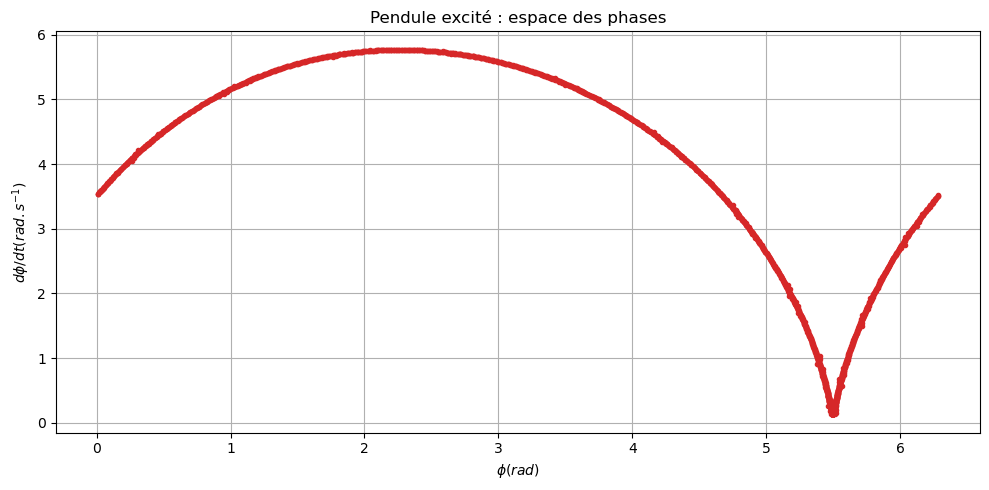

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# --------------------------------------------------------------------
# Paramètres physiques du pendule
# --------------------------------------------------------------------
# brisure de symétrie
phi0 = -0.78
omega0 = 0.15
f = 0.1          # amortissement visqueux
A = 9.0         # amplitude de l'excitation
Pulsation = 3.0  # pulsation de l'excitation en (rad/s)

def pendulum_forced(t, u):
    """
    Système d'équations différentielles pour un pendule pesant
    soumis à un amortissement linéaire et une excitation harmonique.

    Paramètres
    ----------
    t : float
        Temps courant (en secondes).
    u : array_like, shape (2,)
        Vecteur d'état du système :
        - u[0] : angle φ(t) en radians,
        - u[1] : vitesse angulaire ω(t) = dφ/dt en rad/s.

    Retour
    ------
    du_dt : ndarray, shape (2,)
        Dérivée temporelle du vecteur d'état :
        - du_dt[0] = ω,
        - du_dt[1] = -sin(φ) - f·ω + A·sin(Ω·t)
    """
    phi, omega = u
    du_dt = np.zeros_like(u)
    # système d'équations différentielles
    du_dt[0] = omega
    du_dt[1] = -np.sin(phi) -f * omega + A * np.sin(Pulsation * t)
    return du_dt

# --------------------------------------------------------------------
# Simulation principale
# --------------------------------------------------------------------
def simulation(t0, tf, u0):
    """
    Simule la dynamique d'un pendule amorti et forcé sur un intervalle de temps donné.

    Paramètres
    ----------
    t0 : float
        Temps initial de la simulation (en secondes).
    tf : float
        Temps final de la simulation (en secondes).
    u0 : array_like, shape (2,)
        Conditions initiales :
        - u0[0] : angle initial φ(0) en radians,
        - u0[1] : vitesse angulaire initiale ω(0) en rad/s.

    Retour
    ------
    tw : ndarray
        Tableau des instants de temps (2000 points uniformément répartis de 0 à tf).
    sol : 
        Résultat de l’intégration retourné par `solve_ivp`.
        Contient notamment :
        - `sol.t` : les temps évalués (identique à `tw`),
        - `sol.y` : les solutions (φ et ω) à chaque instant.
    """
    # Temps de sauvegarde
    tw = np.linspace(t0, tf, 2000)

    # Intégration
    sol = solve_ivp(pendulum_forced, (t0, tf), u0, t_eval=tw, method='RK45', max_step=0.1)
    return tw, sol

def draw_evolution(tw, sol):
    """
    Affiche l'évolution temporelle de l'angle et de la vitesse angulaire
    d'un pendule pesant soumis à une excitation harmonique et un amortissement.

    Paramètres
    ----------
    tw : ndarray
        Tableau des instants de temps (en secondes).
    sol : 
        Résultat de l’intégration retourné par `solve_ivp`, contenant :
        - sol.t : les temps évalués (doit coïncider avec tw),
        - sol.y[0] : l’angle φ(t) en radians,
        - sol.y[1] : la vitesse angulaire dφ/dt(t) en rad/s.

    Affichage
    ---------
    Une figure matplotlib présentant deux courbes :
    - φ(t) : en rouge,
    - dφ/dt(t) : en bleu.
    """
    plt.figure(figsize=(10, 5))
    plt.plot(sol.t, sol.y[0], label=r'$\phi(t)$', color='tab:red')
    plt.plot(sol.t, sol.y[1], label=r'$d\phi(t)/dt$', color='tab:blue')
    plt.xlabel("Temps (s)")
    plt.title("Pendule excité : dynamique non linéaire")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

def espace_phase(uw):
    """
    Affiche l'espace des phases (φ, dφ/dt) d'un pendule excité.

    Paramètres
    ----------
    uw : array_like, shape (2, N)
        Tableau contenant les deux composantes :
        - uw[0] : les angles φ(t) en radians,
        - uw[1] : les vitesses angulaires dφ/dt en rad/s.

    Affichage
    ---------
    Une figure matplotlib avec le portrait de phase (φ, dφ/dt),
    où chaque point correspond à un état instantané du système.
    Les points ne sont pas reliés pour visualiser la distribution dans l'espace des phases.
    """

    # Normalisation de l'angle dans [0, 2π[ 
    uw[0] = uw[0] -np.floor(uw[0]/(2.*np.pi))*(2.*np.pi)
    
    plt.figure(figsize=(10, 5))
    plt.plot(uw[0], uw[1], color='tab:red', marker='.', linestyle='none')
    plt.xlabel(r'$\phi(rad)$')
    plt.ylabel(r'$d\phi/dt(rad.s^{-1})$')
    plt.title("Pendule excité : espace des phases")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
# --------------------------------------------------------------------
# Point d’entrée du script
# --------------------------------------------------------------------
if __name__ == "__main__":
    t0 = 0
    tf = 300
    # Conditions initiales : pendule au repos
    u0 = [phi0, omega0]
    [tw, sol] = simulation(t0, tf, u0)
    uw = np.array([sol.y[0], sol.y[1]])
    print(uw.shape)
    espace_phase(uw)

# Exercice : tracé de l'espace de Poincaré

On rappelle que l'espace de Poincaré regroupe les points représentatifs $(\phi, d\phi/dt)$ échantillonnés
tous les $ T = \frac{2\pi}{\text{Pulsation}} $ où Pulsation est celle de l'excitation.

Pour ce faire, vous utiliserez cet algorithme suivant :
1. Initialiser les conditions initiales `u0` avec `[phi0, omega0]`.
2. Définir la durée totale de la simulation `TF` à 1000s.
3. Initialiser le temps de départ `t0` à 0s.
4. Calculer la période `T` avec la formule $ T = \frac{2\pi}{\text{Pulsation}} $ 
5. Calculer le nombre de segments `NCHUNK` en arrondissant $\frac{\text{TF}}{T}$.
6. Afficher `NCHUNK`.
7. Initialiser deux listes vides `t_arr` et `u_arr` pour stocker les résultats.

Pour chaque segment `nchunk` allant de 0 à `NCHUNK - 1` :

1. Mettre à jour le temps de départ `t0` à `nchunk * T`.
2. Calculer le temps final `tf` comme `t0 + T`.    
3. Appeler la fonction `simulation` avec `t0`, `tf`, et `u0` pour obtenir les temps `tw` et les solutions `sol`.
4. Ajouter le dernier élément de `tw` à `t_arr`.
5. Extraire `phi` et `omega` des solutions `sol` en utilisant __les dernières valeurs des composantes de `sol.y`__.
6. Mettre à jour `u0` avec les nouvelles valeurs `[phi, omega]`.
7. Si `t0` est supérieur à $\frac{\text{TF}}{2}$ : pour supprimer les temps courts
   - Ajouter `u0` à `u_arr`.

477


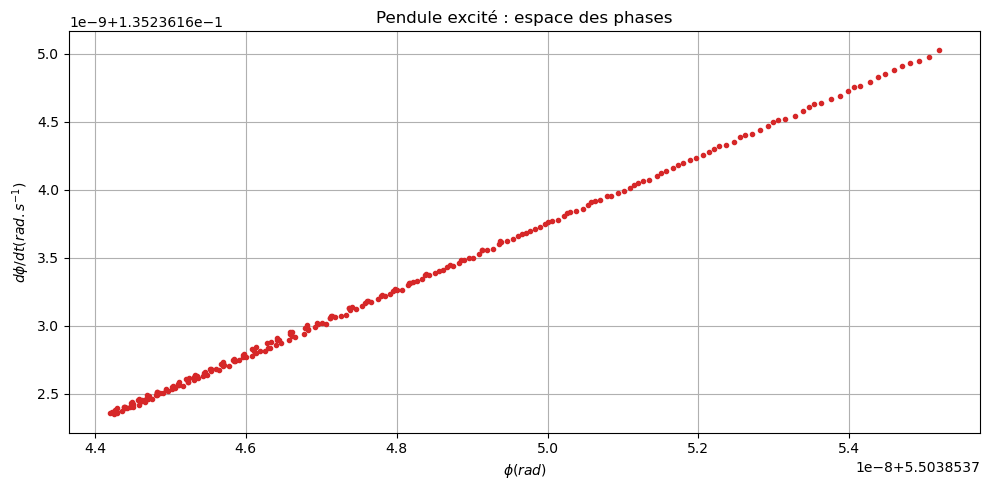

min et max de phi     5.503853744205571 5.50385375518249
min et max de dphi/dt 0.13523616234890234 0.13523616503012495


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# --------------------------------------------------------------------
# Paramètres physiques du pendule
# --------------------------------------------------------------------
# brisure de symétrie
phi0 = -0.78
omega0 = 0.15
f = 0.1          # amortissement visqueux
A = 9.0         # amplitude de l'excitation
Pulsation = 3.0  # pulsation de l'excitation en (rad/s)

# chaos
# phi0 = 0
# omega0 = 0
# f = 0.1              # amortissement visqueux
# A = 1.6              # amplitude de l'excitation
# Pulsation = 0.8      # pulsation de l'excitation (rad/s)

def pendulum_forced(t, u):
    """
    Système d'équations différentielles pour un pendule pesant
    soumis à un amortissement linéaire et une excitation harmonique.

    Paramètres
    ----------
    t : float
        Temps courant (en secondes).
    u : array_like, shape (2,)
        Vecteur d'état du système :
        - u[0] : angle φ(t) en radians,
        - u[1] : vitesse angulaire ω(t) = dφ/dt en rad/s.

    Retour
    ------
    du_dt : ndarray, shape (2,)
        Dérivée temporelle du vecteur d'état :
        - du_dt[0] = ω,
        - du_dt[1] = -sin(φ) - f·ω + A·sin(Ω·t)
    """
    phi, omega = u
    du_dt = np.zeros_like(u)
    # système d'équations différentielles
    du_dt[0] = omega
    du_dt[1] = -np.sin(phi) -f * omega + A * np.sin(Pulsation * t)
    return du_dt

# --------------------------------------------------------------------
# Simulation principale
# --------------------------------------------------------------------
def simulation(t0, tf, u0):
    """
    Simule la dynamique d'un pendule amorti et forcé sur un intervalle de temps donné.

    Paramètres
    ----------
    t0 : float
        Temps initial de la simulation (en secondes).
    tf : float
        Temps final de la simulation (en secondes).
    u0 : array_like, shape (2,)
        Conditions initiales :
        - u0[0] : angle initial φ(0) en radians,
        - u0[1] : vitesse angulaire initiale ω(0) en rad/s.

    Retour
    ------
    tw : ndarray
        Tableau des instants de temps (2000 points uniformément répartis de 0 à tf).
    sol :
        Résultat de l’intégration retourné par `solve_ivp`.
        Contient notamment :
        - `sol.t` : les temps évalués (identique à `tw`),
        - `sol.y` : les solutions (φ et ω) à chaque instant.
    """
    # Temps de sauvegarde
    tw = np.linspace(t0, tf, 2000)

    # Intégration
    # sol = solve_ivp(pendulum_forced, (t0, tf), u0, t_eval=tw, method='RK45')
    sol = solve_ivp(pendulum_forced, (t0, tf), u0, t_eval=tw, method='BDF')
    
    return tw, sol

def draw_evolution(tw, sol):
    """
    Affiche l'évolution temporelle de l'angle et de la vitesse angulaire
    d'un pendule pesant soumis à une excitation harmonique et un amortissement.

    Paramètres
    ----------
    tw : ndarray
        Tableau des instants de temps (en secondes).
    sol : 
        Résultat de l’intégration retourné par `solve_ivp`, contenant :
        - sol.t : les temps évalués (doit coïncider avec tw),
        - sol.y[0] : l’angle φ(t) en radians,
        - sol.y[1] : la vitesse angulaire dφ/dt(t) en rad/s.

    Affichage
    ---------
    Une figure matplotlib présentant deux courbes :
    - φ(t) : en rouge,
    - dφ/dt(t) : en bleu.
    """
    plt.figure(figsize=(10, 5))
    plt.plot(sol.t, sol.y[0], label=r'$\phi(t)$', color='tab:red')
    plt.plot(sol.t, sol.y[1], label=r'$d\phi(t)/dt$', color='tab:blue')
    plt.xlabel("Temps (s)")
    plt.title("Pendule excité : dynamique non linéaire")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

def espace_phase(uw):
    """
    Affiche l'espace des phases (φ, dφ/dt) d'un pendule excité.

    Paramètres
    ----------
    uw : array_like, shape (2, N)
        Tableau contenant les deux composantes :
        - uw[0] : les angles φ(t) en radians,
        - uw[1] : les vitesses angulaires dφ/dt en rad/s.

    Affichage
    ---------
    Une figure matplotlib avec le portrait de phase (φ, dφ/dt),
    où chaque point correspond à un état instantané du système.
    Les points ne sont pas reliés pour visualiser la distribution dans l'espace des phases.
    """
    # Normalisation de l'angle dans [0, 2π[ 
    uw[0] = uw[0] -np.floor(uw[0]/(2.*np.pi))*(2.*np.pi)
    
    plt.figure(figsize=(10, 5))
    plt.plot(uw[0], uw[1], color='tab:red', marker='.', linestyle='none')
    plt.xlabel(r'$\phi(rad)$')
    plt.ylabel(r'$d\phi/dt(rad.s^{-1})$')
    plt.title("Pendule excité : espace des phases")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
        
# --------------------------------------------------------------------
# Point d’entrée du script
# --------------------------------------------------------------------
if __name__ == "__main__":
    # Conditions initiales : pendule au repos
    u0 = [phi0, omega0]
    TF = 1000;
    t0 = 0;
    T = 2*np.pi/Pulsation
    NCHUNK = int(np.round(TF/T)) #obligatoire
    print(NCHUNK)
            
    t_arr=[]
    u_arr=[]
    for nchunk in range(NCHUNK):   
        t0 = nchunk * T 
        tf = t0 + T
        [tw, sol] = simulation(t0, tf, u0)
        t_arr.append(tw[-1])

        # récupération de phi et de omega
        phi, omega = sol.y[0][-1], sol.y[1][-1]

        u0 = [phi, omega]
        if t0>TF/2:  # supprimer les temps courts
            u_arr.append(u0)

        # draw_evolution(tw, sol)

    t_arr=np.array(t_arr)
    u_arr=np.array(u_arr)
    u_arr=u_arr.T

    espace_phase(u_arr)

    print("min et max de phi    ", np.min(u_arr[0]), np.max(u_arr[0]))
    print("min et max de dphi/dt", np.min(u_arr[1]), np.max(u_arr[1]))
    #print(t_arr*Pulsation/(2*np.pi))